In [1]:
from IPython.display import display, HTML

display(HTML("<h2 style='color: #2E86C1;'>Step 1: Load and Inspect the Data</h2>"))

In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
df = pd.read_json("C:\ScourgifyDataProject\Yelp JSON\yelp_dataset\yelp_academic_dataset_business.json", lines=True)

In [4]:
print(df.shape)

(150346, 14)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None


In [6]:
print(df.dtypes)

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object


In [7]:
display(HTML("<h2 style='color: #2E86C1;'>Step 2: Identify Missing Values</h2>"))

In [8]:
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

In [9]:
print(missing_summary[missing_summary['Missing_Count'] > 0])

                Column  Missing_Count  Missing_Percentage
attributes  attributes          13744            9.141580
categories  categories            103            0.068509
hours            hours          23223           15.446370


In [10]:
!pip install missingno

<Axes: >

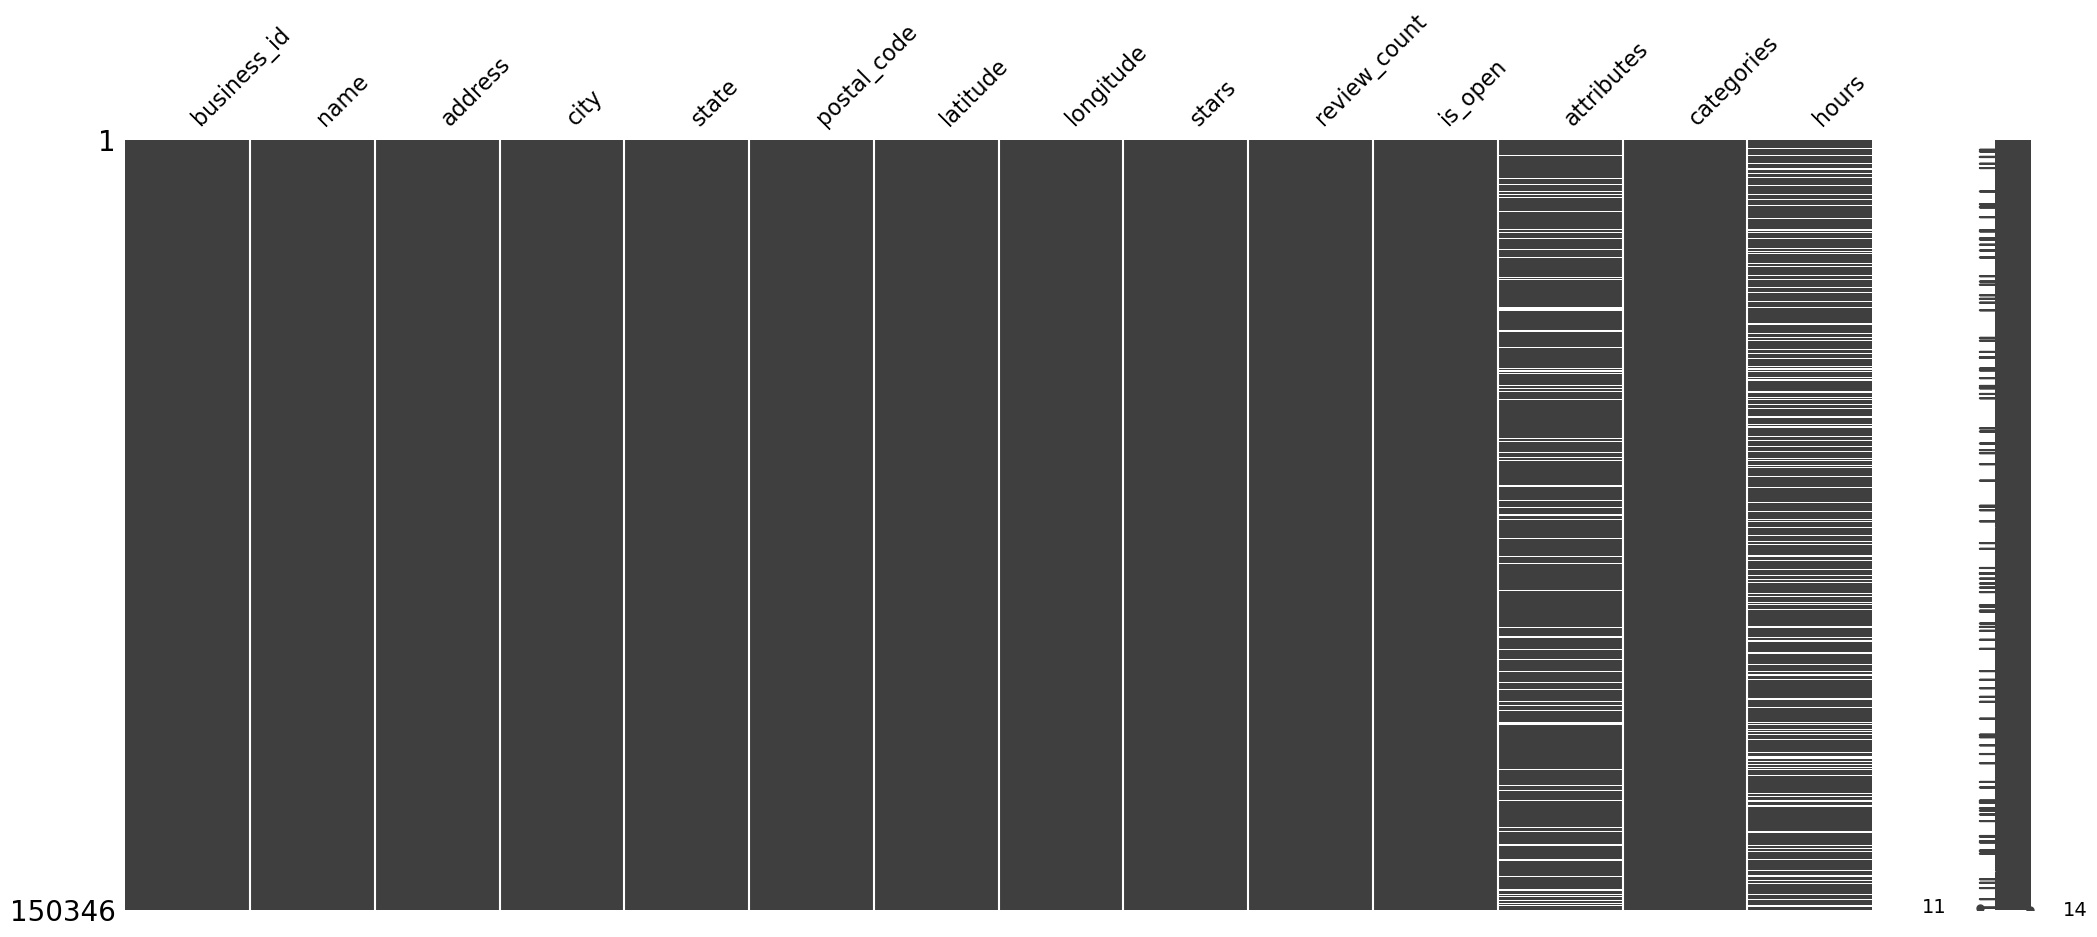

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
display(HTML("<h2 style='color: #2E86C1;'>Step 3: Handle Missing Values</h2>"))

In [13]:
print("\nRows with ANY missing values:", df.isnull().any(axis=1).sum())


Rows with ANY missing values: 32728


In [14]:
print("Rows with ALL values present:", df.notnull().all(axis=1).sum())

Rows with ALL values present: 117618


In [15]:
columns_to_drop = [
    'postal_code',      
    'latitude',         
    'longitude',        
    'hours'             
]

In [16]:
df = df.drop(columns=columns_to_drop)

In [17]:
print(f"categories missing: {df['categories'].isnull().sum()}")

categories missing: 103


In [22]:
df_clean = df.dropna(subset=['categories'])

In [19]:
tourism_keywords = [
    'Restaurants', 'Hotels', 'Food', 'Bars', 'Nightlife',
    'Hotels & Travel', 'Event Planning & Services',
    'Arts & Entertainment', 'Active Life', 'Tours',
    'Coffee & Tea', 'Breakfast & Brunch'
]

In [23]:
def is_tourism_related(categories):
    if pd.isna(categories):
        return False
    return any(keyword.lower() in str(categories).lower() 
               for keyword in tourism_keywords)

df_clean = df_clean[df_clean['categories'].apply(is_tourism_related)]

In [25]:
print(f"categories missing after: {df_clean['categories'].isnull().sum()}")

categories missing after: 0


In [26]:
print(f"total rows remaining: {len(df_clean)}")

total rows remaining: 83834


In [28]:
print(f"attributes missing: {df['attributes'].isnull().sum()}")

attributes missing: 13744


In [31]:
missing_pct = (df['attributes'].isnull().sum() / len(df)) * 100
print(f"Missing percentage: {missing_pct:.2f}%")

Missing percentage: 9.14%


In [33]:
df_clean = df.dropna(subset=['attributes'])

In [35]:
print(f"Rows before: {len(df)}")
print(f"Rows after: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"attributes missing: {df_clean['attributes'].isnull().sum()}")

Rows before: 150346
Rows after: 136602
Rows removed: 13744
attributes missing: 0


In [36]:
print(df_clean.isnull().sum())

business_id     0
name            0
address         0
city            0
state           0
stars           0
review_count    0
is_open         0
attributes      0
categories      1
dtype: int64


In [37]:
df_clean = df_clean.dropna(subset=['categories'])

In [38]:
print("Final check - Missing values:")
print(df_clean.isnull().sum())
print(f"\nTotal rows in clean dataset: {len(df_clean)}")

Final check - Missing values:
business_id     0
name            0
address         0
city            0
state           0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
dtype: int64

Total rows in clean dataset: 136601


In [39]:
display(HTML("<h2 style='color: #2E86C1;'>Step 4: Remove Duplicates</h2>"))

In [42]:
print("="*50)
print("DUPLICATE CHECK AND REMOVAL")
print("="*50)

# Initial count
initial_rows = len(df_clean)
print(f"Initial rows: {initial_rows}")

# Check for duplicate business_ids (most logical for business data)
duplicate_count = df_clean['business_id'].duplicated().sum()
print(f"Duplicate business_ids found: {duplicate_count}")

# Show some duplicates if they exist
if duplicate_count > 0:
    print("\nSample of duplicated businesses:")
    duplicates = df_clean[df_clean['business_id'].duplicated(keep=False)].sort_values('business_id')
    print(duplicates[['business_id', 'name', 'city', 'stars']].head(10))

# Remove duplicates based on business_id
df_clean = df_clean.drop_duplicates(subset=['business_id'], keep='first')
df_clean = df_clean.reset_index(drop=True)

final_rows = len(df_clean)
print(f"\nFinal rows: {final_rows}")
print(f"Duplicates removed: {initial_rows - final_rows}")

# Verify
print(f"\n✓ Duplicate business_ids remaining: {df_clean['business_id'].duplicated().sum()}")
print("✓ Dataset ready for analysis!")

DUPLICATE CHECK AND REMOVAL
Initial rows: 136601
Duplicate business_ids found: 0

Final rows: 136601
Duplicates removed: 0

✓ Duplicate business_ids remaining: 0
✓ Dataset ready for analysis!


In [43]:
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns in dataset:")
print(numerical_cols)

Numerical columns in dataset:
['stars', 'review_count', 'is_open']


In [44]:
print("\nBasic Statistics:")
print(df_clean[numerical_cols].describe())


Basic Statistics:
               stars   review_count        is_open
count  136601.000000  136601.000000  136601.000000
mean        3.623319      48.083623       0.785858
std         0.943832     126.477539       0.410227
min         1.000000       5.000000       0.000000
25%         3.000000       8.000000       1.000000
50%         4.000000      16.000000       1.000000
75%         4.500000      41.000000       1.000000
max         5.000000    7568.000000       1.000000


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

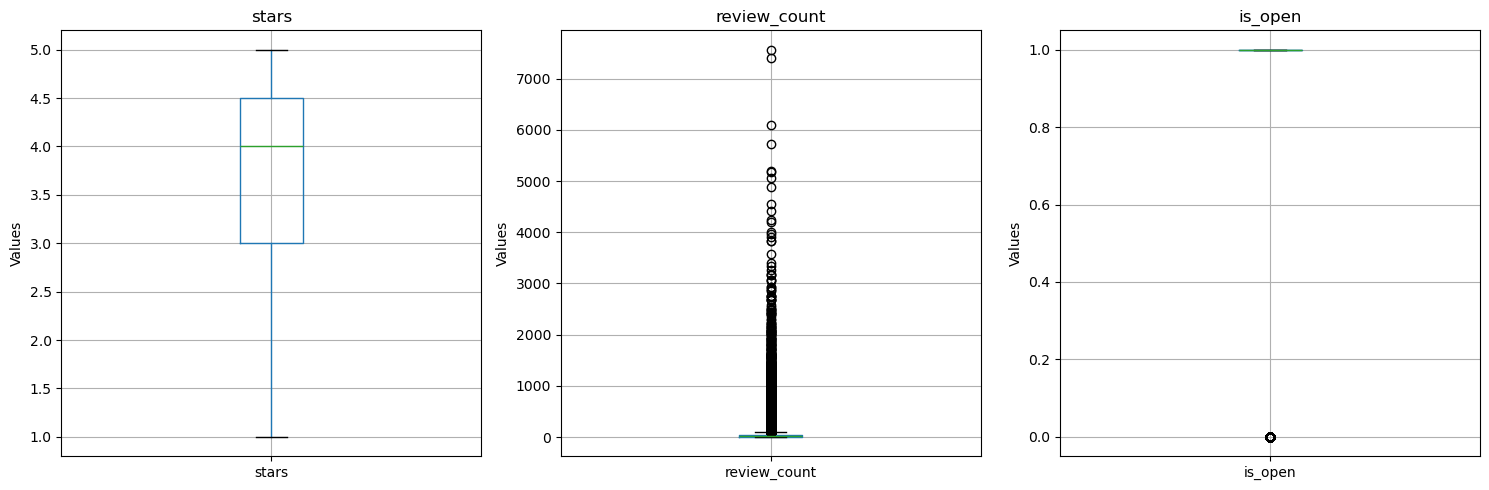

In [46]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 5))

for idx, col in enumerate(numerical_cols):
    if len(numerical_cols) > 1:
        ax = axes[idx]
    else:
        ax = axes
    
    df_clean.boxplot(column=col, ax=ax)
    ax.set_title(f'{col}')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

In [47]:
print("\n1. STARS (Ratings):")
print(f"   Valid range (1-5): {((df_clean['stars'] >= 1) & (df_clean['stars'] <= 5)).all()}")
print(f"   Distribution:\n{df_clean['stars'].value_counts().sort_index()}")


1. STARS (Ratings):
   Valid range (1-5): True
   Distribution:
stars
1.0     1209
1.5     3955
2.0     8197
2.5    12811
3.0    16998
3.5    24689
4.0    29075
4.5    25309
5.0    14358
Name: count, dtype: int64


In [48]:
print("\n2. REVIEW COUNT OUTLIERS:")
Q1 = df_clean['review_count'].quantile(0.25)
Q3 = df_clean['review_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR


2. REVIEW COUNT OUTLIERS:


In [49]:
outliers = df_clean[df_clean['review_count'] > upper_bound]

In [50]:
print(f"   Total businesses: {len(df_clean)}")
print(f"   Outliers (high review count): {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")
print(f"   Upper bound (IQR): {upper_bound:.0f} reviews")
print(f"\n   Top 10 most reviewed businesses:")
print(df_clean.nlargest(10, 'review_count')[['name', 'city', 'review_count', 'stars']].to_string(index=False))

   Total businesses: 136601
   Outliers (high review count): 16072 (11.77%)
   Upper bound (IQR): 90 reviews

   Top 10 most reviewed businesses:
                              name         city  review_count  stars
                 Acme Oyster House  New Orleans          7568    4.0
                      Oceana Grill  New Orleans          7400    4.0
Hattie B’s Hot Chicken - Nashville    Nashville          6093    4.5
           Reading Terminal Market Philadelphia          5721    4.5
        Ruby Slipper - New Orleans  New Orleans          5193    4.5
               Mother's Restaurant  New Orleans          5185    3.5
                       Royal House  New Orleans          5070    4.0
                Commander's Palace  New Orleans          4876    4.5
                              Luke  New Orleans          4554    4.0
                            Cochon  New Orleans          4421    4.0


In [51]:
print(f"\n   Review Count Statistics:")
print(f"   Mean: {df_clean['review_count'].mean():.0f}")
print(f"   Median: {df_clean['review_count'].median():.0f}")
print(f"   75th percentile: {Q3:.0f}")
print(f"   95th percentile: {df_clean['review_count'].quantile(0.95):.0f}")
print(f"   99th percentile: {df_clean['review_count'].quantile(0.99):.0f}")
print(f"   Max: {df_clean['review_count'].max():.0f}")


   Review Count Statistics:
   Mean: 48
   Median: 16
   75th percentile: 41
   95th percentile: 186
   99th percentile: 496
   Max: 7568


In [52]:
print("\n3. IS_OPEN Status:")
print(df_clean['is_open'].value_counts())
closed = df_clean[df_clean['is_open'] == 0]
print(f"   Closed businesses: {len(closed)} ({len(closed)/len(df_clean)*100:.2f}%)")


3. IS_OPEN Status:
is_open
1    107349
0     29252
Name: count, dtype: int64
   Closed businesses: 29252 (21.41%)


In [53]:
print(f"Before: {len(df_clean)} businesses")
print(f"  Open: {(df_clean['is_open'] == 1).sum()}")
print(f"  Closed: {(df_clean['is_open'] == 0).sum()}")

Before: 136601 businesses
  Open: 107349
  Closed: 29252


In [54]:
df_clean = df_clean[df_clean['is_open'] == 1].copy()

In [55]:
print(f"\nAfter: {len(df_clean)} businesses")
print(f"  All businesses are currently OPEN ✓")
print(f"  Removed: {29252} closed businesses")


After: 107349 businesses
  All businesses are currently OPEN ✓
  Removed: 29252 closed businesses


In [56]:
df_clean = df_clean.reset_index(drop=True)

In [58]:
display(HTML("<h2 style='color: #2E86C1;'>Step 5: Standardize Text Data</h2>"))

In [59]:
text_columns = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Text columns found: {text_columns}")

Text columns found: ['business_id', 'name', 'address', 'city', 'state', 'attributes', 'categories']


In [61]:
import re

In [68]:
print(df_clean[['business_id', 'name', 'city', 'state', 'categories']].head(10))

              business_id                      name           city state  \
0  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store         Affton    MO   
1  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   Philadelphia    PA   
2  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery     Green Lane    PA   
3  CF33F8-E6oudUQ46HnavjQ            Sonic Drive-In   Ashland City    TN   
4  n_0UpQx1hsNbnPUSlodU8w           Famous Footwear      Brentwood    MO   
5  bBDDEgkFA1Otx9Lfe7BZUQ            Sonic Drive-In      Nashville    TN   
6  UJsufbvfyfONHeWdvAHKjA                 Marshalls  Land O' Lakes    FL   
7  eEOYSgkmpB90uNA7lDOMRA     Vietnamese Food Truck      Tampa Bay    FL   
8  il_Ro8jwPlHresjw9EGmBg                   Denny's   Indianapolis    IN   
9  jaxMSoInw8Poo3XeMJt8lQ              Adams Dental     Clearwater    FL   

                                          categories  
0  Shipping Centers, Local Services, Notaries, Ma...  
1  Restaurants, Food, Bubble Tea, Coffee & Tea, B... 

In [69]:
display(HTML("<h2 style='color: #2E86C1;'>Step 6: Handle Nested JSON Fields</h2>"))

In [70]:
import ast

In [71]:
def handle_nested_json_fields(df):
    """
    Handle nested JSON fields in tourism business data
    Focuses on attributes and categories columns
    """
    print("="*70)
    print("HANDLING NESTED JSON FIELDS")
    print("="*70)
    
    df_clean = df.copy()
    
    # ========================================
    # 1. ANALYZE ATTRIBUTES STRUCTURE
    # ========================================
    print("\n" + "-"*70)
    print("Step 1: Analyzing attributes structure...")
    print("-"*70)
    
    # Check data type and format
    print(f"Attributes data type: {df_clean['attributes'].dtype}")
    print(f"\nSample attributes (first 3):")
    for i, attr in enumerate(df_clean['attributes'].head(3)):
        print(f"\n  Row {i}: {type(attr)}")
        print(f"    {str(attr)[:200]}...")
    
    # Check if attributes are already dicts or strings
    sample_attr = df_clean['attributes'].iloc[0]
    is_dict = isinstance(sample_attr, dict)
    is_string = isinstance(sample_attr, str)
    
    print(f"\nAttributes are stored as: {'dict' if is_dict else 'string' if is_string else 'unknown'}")
    
    # ========================================
    # 2. PARSE ATTRIBUTES FROM STRING TO DICT
    # ========================================
    if is_string:
        print("\n" + "-"*70)
        print("Step 2: Converting string attributes to dictionaries...")
        print("-"*70)
        
        def safe_parse_dict(x):
            """Safely parse string to dictionary"""
            if pd.isna(x) or x == '' or x == '{}':
                return {}
            try:
                # Try json.loads first
                return json.loads(x)
            except:
                try:
                    # Try ast.literal_eval for Python dict strings
                    return ast.literal_eval(x)
                except:
                    # If all fails, return empty dict
                    return {}
        
        df_clean['attributes_parsed'] = df_clean['attributes'].apply(safe_parse_dict)
        print("✓ Attributes parsed to dictionaries")
    else:
        df_clean['attributes_parsed'] = df_clean['attributes']
        print("\n✓ Attributes already in dictionary format")
    
    # ========================================
    # 3. EXTRACT COMMON ATTRIBUTES
    # ========================================
    print("\n" + "-"*70)
    print("Step 3: Extracting common attribute keys...")
    print("-"*70)
    
    # Find all unique attribute keys
    all_keys = set()
    for attr_dict in df_clean['attributes_parsed']:
        if isinstance(attr_dict, dict):
            all_keys.update(attr_dict.keys())
    
    print(f"Total unique attribute keys found: {len(all_keys)}")
    print(f"\nMost common attributes:")
    
    # Count frequency of each attribute
    key_counts = {}
    for attr_dict in df_clean['attributes_parsed']:
        if isinstance(attr_dict, dict):
            for key in attr_dict.keys():
                key_counts[key] = key_counts.get(key, 0) + 1
    
    # Sort by frequency
    sorted_keys = sorted(key_counts.items(), key=lambda x: x[1], reverse=True)
    for key, count in sorted_keys[:20]:
        percentage = (count / len(df_clean)) * 100
        print(f"  {key}: {count} ({percentage:.1f}%)")
    
    # ========================================
    # 4. EXTRACT KEY ATTRIBUTES TO COLUMNS
    # ========================================
    print("\n" + "-"*70)
    print("Step 4: Extracting important attributes to separate columns...")
    print("-"*70)
    
    # Define important attributes for tourism analysis
    important_attrs = [
        'BusinessAcceptsCreditCards',
        'RestaurantsTakeOut',
        'RestaurantsDelivery',
        'OutdoorSeating',
        'WiFi',
        'GoodForKids',
        'RestaurantsPriceRange2',
        'BikeParking',
        'WheelchairAccessible',
        'Caters',
        'Alcohol',
        'BusinessParking',
        'HasTV',
        'RestaurantsReservations',
        'GoodForGroups',
        'Ambience'
    ]
    
    # Extract each important attribute to its own column
    extracted_count = 0
    for attr_name in important_attrs:
        if attr_name in all_keys:
            df_clean[f'attr_{attr_name}'] = df_clean['attributes_parsed'].apply(
                lambda x: x.get(attr_name, None) if isinstance(x, dict) else None
            )
            extracted_count += 1
            non_null = df_clean[f'attr_{attr_name}'].notna().sum()
            print(f"  ✓ Extracted {attr_name}: {non_null} non-null values")
    
    print(f"\n✓ Total attributes extracted: {extracted_count} columns")
    
    # ========================================
    # 5. CLEAN EXTRACTED ATTRIBUTES
    # ========================================
    print("\n" + "-"*70)
    print("Step 5: Cleaning extracted attribute values...")
    print("-"*70)
    
    # Convert string booleans to actual booleans
    for col in df_clean.columns:
        if col.startswith('attr_'):
            # Convert 'True'/'False' strings to boolean
            df_clean[col] = df_clean[col].apply(lambda x: 
                True if str(x).strip().lower() == 'true' 
                else False if str(x).strip().lower() == 'false' 
                else x
            )
            
            # Remove "u'" prefix from strings (unicode markers)
            df_clean[col] = df_clean[col].apply(lambda x: 
                str(x).replace("u'", "'").replace("'", "") if isinstance(x, str) 
                else x
            )
    
    print("✓ Attribute values cleaned and standardized")
    
    # ========================================
    # 6. HANDLE CATEGORIES (Split to List)
    # ========================================
    print("\n" + "-"*70)
    print("Step 6: Processing categories...")
    print("-"*70)
    
    # Split categories by comma
    df_clean['categories_list'] = df_clean['categories'].str.split(',').apply(
        lambda x: [cat.strip() for cat in x] if isinstance(x, list) else []
    )
    
    # Count categories per business
    df_clean['num_categories'] = df_clean['categories_list'].apply(len)
    
    print(f"✓ Categories split into lists")
    print(f"  Average categories per business: {df_clean['num_categories'].mean():.1f}")
    print(f"  Max categories: {df_clean['num_categories'].max()}")
    print(f"  Min categories: {df_clean['num_categories'].min()}")
    
    # Get most common categories
    from collections import Counter
    all_categories = []
    for cats in df_clean['categories_list']:
        all_categories.extend(cats)
    
    category_counts = Counter(all_categories)
    print(f"\nTop 10 most common categories:")
    for cat, count in category_counts.most_common(10):
        print(f"  {cat}: {count}")
    
    # ========================================
    # 7. CREATE BINARY INDICATORS
    # ========================================
    print("\n" + "-"*70)
    print("Step 7: Creating binary indicators for key features...")
    print("-"*70)
    
    def safe_bool_convert(series, default=False):
        """Safely convert a series to boolean values"""
        def to_bool(x):
            if pd.isna(x) or x is None:
                return default
            if isinstance(x, bool):
                return x
            if isinstance(x, str):
                return x.lower() == 'true'
            return bool(x)
        return series.apply(to_bool)
    
    # Tourism-relevant binary features
    if 'attr_BusinessAcceptsCreditCards' in df_clean.columns:
        df_clean['accepts_credit_cards'] = safe_bool_convert(df_clean['attr_BusinessAcceptsCreditCards'])
    else:
        df_clean['accepts_credit_cards'] = False
    
    if 'attr_GoodForKids' in df_clean.columns:
        df_clean['good_for_kids'] = safe_bool_convert(df_clean['attr_GoodForKids'])
    else:
        df_clean['good_for_kids'] = False
    
    if 'attr_WiFi' in df_clean.columns:
        df_clean['has_wifi'] = df_clean['attr_WiFi'].apply(
            lambda x: True if x and str(x).lower() not in ['no', 'none', 'false', ''] else False
        )
    else:
        df_clean['has_wifi'] = False
    
    if 'attr_WheelchairAccessible' in df_clean.columns:
        df_clean['wheelchair_accessible'] = safe_bool_convert(df_clean['attr_WheelchairAccessible'])
    else:
        df_clean['wheelchair_accessible'] = False
    
    if 'attr_OutdoorSeating' in df_clean.columns:
        df_clean['outdoor_seating'] = safe_bool_convert(df_clean['attr_OutdoorSeating'])
    else:
        df_clean['outdoor_seating'] = False
    
    if 'attr_RestaurantsTakeOut' in df_clean.columns:
        df_clean['takeout_available'] = safe_bool_convert(df_clean['attr_RestaurantsTakeOut'])
    else:
        df_clean['takeout_available'] = False
    
    print("✓ Binary indicators created:")
    print(f"  Accepts credit cards: {df_clean['accepts_credit_cards'].sum()}")
    print(f"  Good for kids: {df_clean['good_for_kids'].sum()}")
    print(f"  Has WiFi: {df_clean['has_wifi'].sum()}")
    print(f"  Wheelchair accessible: {df_clean['wheelchair_accessible'].sum()}")
    print(f"  Outdoor seating: {df_clean['outdoor_seating'].sum()}")
    print(f"  Takeout available: {df_clean['takeout_available'].sum()}")
    
    # ========================================
    # 8. SUMMARY STATISTICS
    # ========================================
    print("\n" + "="*70)
    print("NESTED JSON PROCESSING COMPLETE!")
    print("="*70)
    
    new_columns = [col for col in df_clean.columns if col not in df.columns]
    print(f"\n✓ New columns created: {len(new_columns)}")
    print(f"\nNew columns list:")
    for col in new_columns[:20]:  # Show first 20
        print(f"  - {col}")
    if len(new_columns) > 20:
        print(f"  ... and {len(new_columns) - 20} more")
    
    print(f"\n✓ Total columns: {len(df_clean.columns)}")
    print(f"✓ Total rows: {len(df_clean)}")
    print("\nDataset ready for sentiment analysis with expanded features! 🎉")
    
    return df_clean


# ========================================
# USAGE
# ========================================
# Apply JSON handling to your dataframe
df_clean = handle_nested_json_fields(df_clean)

# Display sample of new columns
print("\n" + "="*70)
print("SAMPLE OF PROCESSED DATA:")
print("="*70)
display_cols = ['name', 'city', 'stars', 'review_count', 'num_categories', 
                'accepts_credit_cards', 'good_for_kids', 'has_wifi']
available_cols = [col for col in display_cols if col in df_clean.columns]
print(df_clean[available_cols].head(10))

HANDLING NESTED JSON FIELDS

----------------------------------------------------------------------
Step 1: Analyzing attributes structure...
----------------------------------------------------------------------
Attributes data type: object

Sample attributes (first 3):

  Row 0: <class 'dict'>
    {'BusinessAcceptsCreditCards': 'True'}...

  Row 1: <class 'dict'>
    {'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': Fals...

  Row 2: <class 'dict'>
    {'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False...

Attributes are stored as: dict

✓ Attributes already in dictionary format

----------------------------------------------------------------------
Step 3: Extracting common attribute keys...


In [72]:
df_clean = handle_nested_json_fields(df_clean)

HANDLING NESTED JSON FIELDS

----------------------------------------------------------------------
Step 1: Analyzing attributes structure...
----------------------------------------------------------------------
Attributes data type: object

Sample attributes (first 3):

  Row 0: <class 'dict'>
    {'BusinessAcceptsCreditCards': 'True'}...

  Row 1: <class 'dict'>
    {'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': Fals...

  Row 2: <class 'dict'>
    {'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False...

Attributes are stored as: dict

✓ Attributes already in dictionary format

----------------------------------------------------------------------
Step 3: Extracting common attribute keys...


In [73]:

def validate_data_consistency(df):
    """
    Comprehensive data validation for tourism business dataset
    """
    print("="*70)
    print("DATA CONSISTENCY VALIDATION")
    print("="*70)
    print(f"Dataset: {len(df)} rows × {len(df.columns)} columns\n")
    
    issues_found = []
    warnings_found = []
    
    # ========================================
    # 1. CHECK FOR MISSING VALUES
    # ========================================
    print("-"*70)
    print("1. MISSING VALUES CHECK")
    print("-"*70)
    
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing': missing.values,
        'Percentage': missing_pct.values
    })
    missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)
    
    if len(missing_df) > 0:
        print("⚠ Columns with missing values:")
        print(missing_df.to_string(index=False))
        warnings_found.append(f"{len(missing_df)} columns have missing values")
    else:
        print("✓ No missing values found!")
    
    # ========================================
    # 2. CHECK UNIQUE IDENTIFIERS
    # ========================================
    print("\n" + "-"*70)
    print("2. UNIQUE IDENTIFIER CHECK")
    print("-"*70)
    
    if 'business_id' in df.columns:
        total_ids = len(df)
        unique_ids = df['business_id'].nunique()
        duplicate_ids = total_ids - unique_ids
        
        print(f"Total rows: {total_ids}")
        print(f"Unique business_ids: {unique_ids}")
        
        if duplicate_ids > 0:
            print(f"❌ ISSUE: {duplicate_ids} duplicate business_ids found!")
            issues_found.append(f"{duplicate_ids} duplicate business IDs")
            
            # Show duplicates
            dupes = df[df['business_id'].duplicated(keep=False)]
            print(f"\nDuplicate business_ids:")
            print(dupes[['business_id', 'name', 'city']].head(10))
        else:
            print("✓ All business_ids are unique!")
    else:
        print("⚠ No 'business_id' column found")
        warnings_found.append("No business_id column")
    
    # ========================================
    # 3. VALIDATE RATINGS (STARS)
    # ========================================
    print("\n" + "-"*70)
    print("3. RATINGS VALIDATION")
    print("-"*70)
    
    if 'stars' in df.columns:
        min_stars = df['stars'].min()
        max_stars = df['stars'].max()
        mean_stars = df['stars'].mean()
        
        print(f"Star rating range: [{min_stars}, {max_stars}]")
        print(f"Mean rating: {mean_stars:.2f}")
        
        # Check for invalid ratings
        invalid_stars = df[(df['stars'] < 1) | (df['stars'] > 5)]
        if len(invalid_stars) > 0:
            print(f"❌ ISSUE: {len(invalid_stars)} rows with invalid star ratings (outside 1-5 range)")
            print(f"Invalid values: {invalid_stars['stars'].unique()}")
            issues_found.append(f"{len(invalid_stars)} invalid star ratings")
        else:
            print("✓ All star ratings are valid (1-5 range)")
        
        # Check distribution
        print(f"\nStar rating distribution:")
        print(df['stars'].value_counts().sort_index())
    else:
        print("⚠ No 'stars' column found")
        warnings_found.append("No stars column")
    
    # ========================================
    # 4. VALIDATE REVIEW COUNTS
    # ========================================
    print("\n" + "-"*70)
    print("4. REVIEW COUNT VALIDATION")
    print("-"*70)
    
    if 'review_count' in df.columns:
        min_reviews = df['review_count'].min()
        max_reviews = df['review_count'].max()
        mean_reviews = df['review_count'].mean()
        median_reviews = df['review_count'].median()
        
        print(f"Review count range: [{min_reviews}, {max_reviews}]")
        print(f"Mean: {mean_reviews:.1f}, Median: {median_reviews:.1f}")
        
        # Check for negative reviews
        negative_reviews = df[df['review_count'] < 0]
        if len(negative_reviews) > 0:
            print(f"❌ ISSUE: {len(negative_reviews)} rows with negative review counts")
            issues_found.append(f"{len(negative_reviews)} negative review counts")
        else:
            print("✓ No negative review counts")
        
        # Check for businesses with 0 reviews
        zero_reviews = df[df['review_count'] == 0]
        print(f"\nBusinesses with 0 reviews: {len(zero_reviews)} ({len(zero_reviews)/len(df)*100:.2f}%)")
        if len(zero_reviews) > 0:
            warnings_found.append(f"{len(zero_reviews)} businesses have 0 reviews")
    else:
        print("⚠ No 'review_count' column found")
        warnings_found.append("No review_count column")
    
    # ========================================
    # 5. VALIDATE STATUS (IS_OPEN)
    # ========================================
    print("\n" + "-"*70)
    print("5. BUSINESS STATUS VALIDATION")
    print("-"*70)
    
    if 'is_open' in df.columns:
        # Check for valid values (should be 0 or 1)
        unique_values = df['is_open'].unique()
        print(f"Unique values in is_open: {sorted(unique_values)}")
        
        invalid_status = df[~df['is_open'].isin([0, 1])]
        if len(invalid_status) > 0:
            print(f"❌ ISSUE: {len(invalid_status)} rows with invalid is_open values")
            print(f"Invalid values: {invalid_status['is_open'].unique()}")
            issues_found.append(f"{len(invalid_status)} invalid is_open values")
        else:
            print("✓ All is_open values are valid (0 or 1)")
        
        # Show distribution
        print(f"\nBusiness status distribution:")
        status_counts = df['is_open'].value_counts()
        print(f"  Open (1): {status_counts.get(1, 0)} ({status_counts.get(1, 0)/len(df)*100:.2f}%)")
        print(f"  Closed (0): {status_counts.get(0, 0)} ({status_counts.get(0, 0)/len(df)*100:.2f}%)")
    else:
        print("⚠ No 'is_open' column found")
        warnings_found.append("No is_open column")
    
    # ========================================
    # 6. VALIDATE TEXT FIELDS
    # ========================================
    print("\n" + "-"*70)
    print("6. TEXT FIELDS VALIDATION")
    print("-"*70)
    
    text_columns = ['name', 'address', 'city', 'state', 'categories']
    
    for col in text_columns:
        if col in df.columns:
            # Check for empty strings
            empty_strings = df[df[col] == '']
            
            # Check for whitespace-only strings
            whitespace_only = df[df[col].astype(str).str.strip() == '']
            
            # Check for leading/trailing spaces
            has_spaces = (df[col].astype(str) != df[col].astype(str).str.strip()).sum()
            
            print(f"\n{col}:")
            print(f"  Unique values: {df[col].nunique()}")
            
            if len(empty_strings) > 0:
                print(f"  ⚠ Empty strings: {len(empty_strings)}")
                warnings_found.append(f"{col} has {len(empty_strings)} empty strings")
            
            if len(whitespace_only) > 0:
                print(f"  ⚠ Whitespace-only: {len(whitespace_only)}")
                warnings_found.append(f"{col} has {len(whitespace_only)} whitespace entries")
            
            if has_spaces > 0:
                print(f"  ⚠ Leading/trailing spaces: {has_spaces} rows")
                warnings_found.append(f"{col} has {has_spaces} rows with spaces")
            
            if len(empty_strings) == 0 and len(whitespace_only) == 0 and has_spaces == 0:
                print(f"  ✓ No issues found")
    
    # ========================================
    # 7. VALIDATE STATE CODES
    # ========================================
    print("\n" + "-"*70)
    print("7. STATE CODES VALIDATION")
    print("-"*70)
    
    if 'state' in df.columns:
        # Valid US state codes
        valid_states = {
            'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
            'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
            'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
            'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
            'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
            'DC', 'PR', 'VI', 'GU', 'AS', 'MP'
        }
        
        unique_states = set(df['state'].unique())
        print(f"Unique states in dataset: {len(unique_states)}")
        print(f"States: {sorted(unique_states)}")
        
        invalid_states = unique_states - valid_states
        if len(invalid_states) > 0:
            print(f"\n⚠ WARNING: Invalid state codes found: {invalid_states}")
            invalid_count = df[df['state'].isin(invalid_states)].shape[0]
            print(f"  Rows with invalid states: {invalid_count}")
            warnings_found.append(f"{len(invalid_states)} invalid state codes")
        else:
            print("✓ All state codes are valid US states")
    else:
        print("⚠ No 'state' column found")
    
    # ========================================
    # 8. CHECK DATA TYPES
    # ========================================
    print("\n" + "-"*70)
    print("8. DATA TYPES VALIDATION")
    print("-"*70)
    
    expected_types = {
        'business_id': 'object',
        'name': 'object',
        'address': 'object',
        'city': 'object',
        'state': 'object',
        'stars': ['float64', 'int64'],
        'review_count': ['int64', 'float64'],
        'is_open': ['int64', 'float64']
    }
    
    print("Checking expected data types...")
    for col, expected in expected_types.items():
        if col in df.columns:
            actual = str(df[col].dtype)
            expected_list = expected if isinstance(expected, list) else [expected]
            
            if actual in expected_list:
                print(f"  ✓ {col}: {actual}")
            else:
                print(f"  ⚠ {col}: Expected {expected_list}, got {actual}")
                warnings_found.append(f"{col} has unexpected type {actual}")
    
    # ========================================
    # 9. LOGICAL CONSISTENCY CHECKS
    # ========================================
    print("\n" + "-"*70)
    print("9. LOGICAL CONSISTENCY CHECKS")
    print("-"*70)
    
    # Check: businesses with high ratings but few reviews (suspicious)
    if 'stars' in df.columns and 'review_count' in df.columns:
        suspicious = df[(df['stars'] >= 4.5) & (df['review_count'] == 1)]
        print(f"Businesses with 5-star rating but only 1 review: {len(suspicious)}")
        if len(suspicious) > 100:
            warnings_found.append(f"{len(suspicious)} businesses have perfect ratings with only 1 review")
    
    # Check: closed businesses with recent reviews (if review date available)
    if 'is_open' in df.columns:
        closed = df[df['is_open'] == 0]
        print(f"Closed businesses still in dataset: {len(closed)}")
        if len(closed) > 0:
            warnings_found.append(f"{len(closed)} closed businesses in dataset")
    
    # ========================================
    # 10. FINAL SUMMARY
    # ========================================
    print("\n" + "="*70)
    print("VALIDATION SUMMARY")
    print("="*70)
    
    if len(issues_found) == 0 and len(warnings_found) == 0:
        print("✅ EXCELLENT! No issues or warnings found.")
        print("   Your dataset is clean and consistent!")
    else:
        if len(issues_found) > 0:
            print(f"\n❌ CRITICAL ISSUES FOUND: {len(issues_found)}")
            for i, issue in enumerate(issues_found, 1):
                print(f"   {i}. {issue}")
        
        if len(warnings_found) > 0:
            print(f"\n⚠ WARNINGS: {len(warnings_found)}")
            for i, warning in enumerate(warnings_found, 1):
                print(f"   {i}. {warning}")
    
    print("\n" + "="*70)
    print(f"Dataset Size: {len(df):,} rows × {len(df.columns)} columns")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("="*70)
    
    return {
        'issues': issues_found,
        'warnings': warnings_found,
        'is_valid': len(issues_found) == 0
    }


# ========================================
# USAGE
# ========================================
validation_results = validate_data_consistency(df_clean)

# Show recommendation based on results
print("\n" + "="*70)
print("RECOMMENDATIONS")
print("="*70)

if validation_results['is_valid']:
    print("✅ Your dataset is ready for sentiment analysis!")
    print("\nNext steps:")
    print("  1. Save the cleaned dataset")
    print("  2. Begin sentiment analysis")
    print("  3. Create visualizations")
else:
    print("⚠ Please address the critical issues before proceeding:")
    for issue in validation_results['issues']:
        print(f"  - {issue}")

DATA CONSISTENCY VALIDATION
Dataset: 107349 rows × 34 columns

----------------------------------------------------------------------
1. MISSING VALUES CHECK
----------------------------------------------------------------------
⚠ Columns with missing values:
                         Column  Missing  Percentage
      attr_WheelchairAccessible    83206       77.51
                   attr_Alcohol    79291       73.86
                    attr_Caters    78828       73.43
                  attr_Ambience    77802       72.48
   attr_RestaurantsReservations    77531       72.22
                     attr_HasTV    77049       71.77
            attr_OutdoorSeating    75269       70.12
               attr_GoodForKids    71091       66.22
       attr_RestaurantsDelivery    67144       62.55
        attr_RestaurantsTakeOut    64935       60.49
                      attr_WiFi    64744       60.31
               attr_BikeParking    51102       47.60
    attr_RestaurantsPriceRange2    46279       43.1